In [15]:
%pip install --no-cache-dir --force-reinstall git+https://github.com/DMJTax/prtools.git#egg=prtools

  Cloning https://github.com/DMJTax/prtools.git to /private/var/folders/41/9hldc1z978zfcdj5cftx6n5c0000gn/T/pip-install-2z8n0lrd/prtools_9029df847ea4482b88f6367101d8608b
  Running command git clone --filter=blob:none --quiet https://github.com/DMJTax/prtools.git /private/var/folders/41/9hldc1z978zfcdj5cftx6n5c0000gn/T/pip-install-2z8n0lrd/prtools_9029df847ea4482b88f6367101d8608b
  Resolved https://github.com/DMJTax/prtools.git to commit 38dee74c266c54a1c75318390edc21a87668264f
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 12.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 12.9 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 14.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 8.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import prtools as pr

/var/folders/41/9hldc1z978zfcdj5cftx6n5c0000gn/T/ipykernel_38052/1813422839.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_classes)


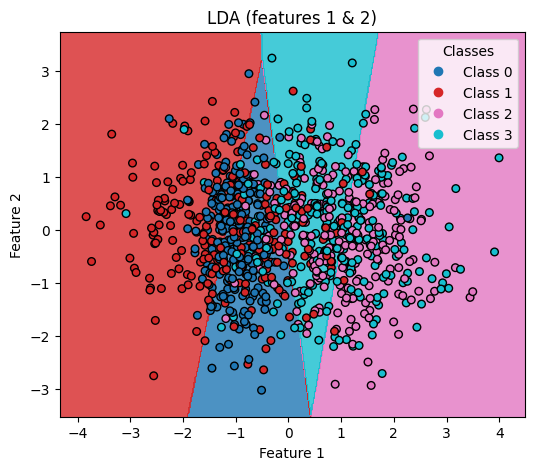

/var/folders/41/9hldc1z978zfcdj5cftx6n5c0000gn/T/ipykernel_38052/1813422839.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', n_classes)


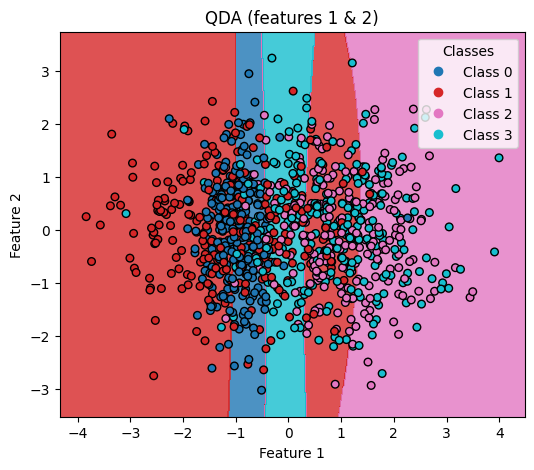

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import BoundaryNorm

# Generate toy data with 3 classes
X, y = make_classification(n_samples=1000, n_features=4, n_redundant=0,
                           n_clusters_per_class=1, n_classes=4, random_state=42)

# Fit models
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

lda.fit(X, y)
qda.fit(X, y)

# Plotting function
def plot_boundary(model, X, y,
                  feature_indices=(0,1),
                  title="Decision Boundaries",
                  h=0.02):
    """
    Plot decision regions of `model` trained on X (n_samples×n_features),
    projecting onto the two dimensions given by feature_indices.
    """
    # 1) Compute means of all features
    feature_means = X.mean(axis=0)

    # 2) Build the 2D grid on the chosen features
    X2 = X[:, feature_indices]
    x_min, x_max = X2[:, 0].min() - .5, X2[:, 0].max() + .5
    y_min, y_max = X2[:, 1].min() - .5, X2[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid2 = np.c_[xx.ravel(), yy.ravel()]

    # 3) Expand each 2D grid point to the full feature space
    n_points = grid2.shape[0]
    grid_full = np.tile(feature_means, (n_points, 1))
    grid_full[:, feature_indices[0]] = grid2[:, 0]
    grid_full[:, feature_indices[1]] = grid2[:, 1]

    # 4) Predict on the full grid, then reshape
    Z = model.predict(grid_full)
    Z = Z.reshape(xx.shape)

    # 5) Plot with a discrete colormap
    classes = np.unique(y)
    n_classes = len(classes)
    cmap = cm.get_cmap('tab10', n_classes)
    norm = BoundaryNorm(np.arange(n_classes + 1) - 0.5, n_classes)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap, norm=norm, alpha=0.8)
    scatter = plt.scatter(
        X2[:, 0], X2[:, 1],
        c=y, cmap=cmap, norm=norm,
        edgecolor='k', s=30
    )
    plt.title(title)
    plt.xlabel(f"Feature {feature_indices[0] + 1}")
    plt.ylabel(f"Feature {feature_indices[1] + 1}")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend(handles=scatter.legend_elements()[0],
               labels=[f"Class {c}" for c in classes],
               title="Classes",
               loc="upper right")
    plt.show()

# assuming you've already fit lda and qda on X, y
plot_boundary(lda, X, y, feature_indices=(0,1), title="LDA (features 1 & 2)")
plot_boundary(qda, X, y, feature_indices=(0,1), title="QDA (features 1 & 2)")

In [19]:
from sklearn.model_selection import cross_val_score

for name, model in [("LDA", lda), ("QDA", qda)]:
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name} 5-fold accuracy: {scores.mean():.3f} ± {scores.std():.3f}")

LDA 5-fold accuracy: 0.804 ± 0.022
QDA 5-fold accuracy: 0.887 ± 0.020


Banana dataset 100 by 2 prdataset with 2 classes: [50 50]


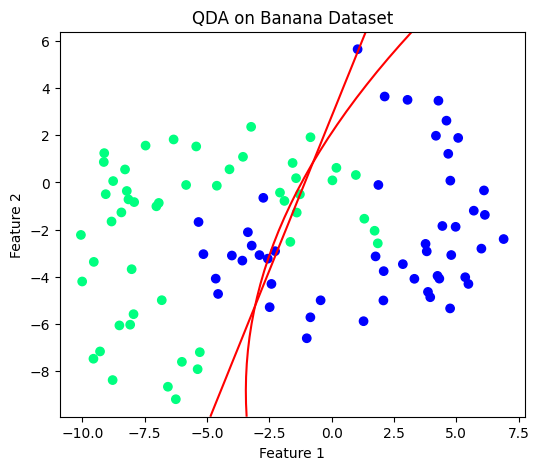

In [11]:
# 2. Wrap into a PRTools dataset
#    pr.prdataset takes (data, labels)
b = pr.gendatb()

print(b)


w_qda = pr.qdc(b)
w_lda = pr.ldc(b)
# 3. Plot the data and the QDA decision regions
plt.figure(figsize=(6,5))
pr.scatterd(b)       # plot the banana‐shaped points
pr.plotc(w_qda)
pr.plotc(w_lda) # overlay the QDA boundary (curved)
plt.title("QDA on Banana Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

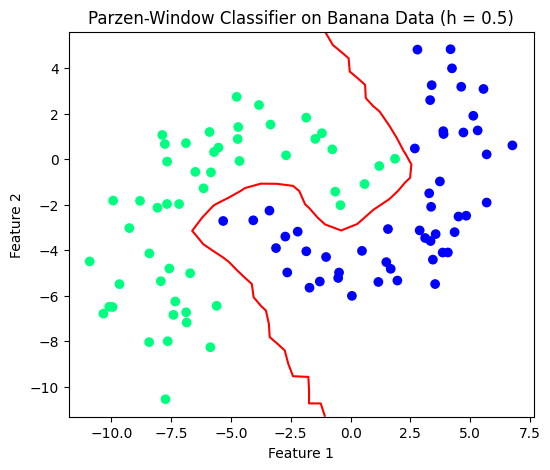

In [20]:
# 1) Generate banana data
b = pr.gendatb()

# 2) Train a Parzen‐window classifier
#    The second argument is the smoothing parameter (h).
#    You’ll want to tune this (e.g. 0.2, 0.5, 1.0, …).
w_parzen = pr.parzenc(b, 0.5)

# 3) Plot the decision regions
import matplotlib.pyplot as plt
plt.figure(figsize=(6,5))
pr.scatterd(b)
pr.plotc(w_parzen)
plt.title("Parzen‐Window Classifier on Banana Data (h = 0.5)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()